<a href="https://www.kaggle.com/code/jovanchua/human-emotions-cv-wip?scriptVersionId=141230653" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-emotion-recognition/emotions.csv
/kaggle/input/facial-emotion-recognition/images/7/Disgust.jpg
/kaggle/input/facial-emotion-recognition/images/7/Anger.jpg
/kaggle/input/facial-emotion-recognition/images/7/Sad.jpg
/kaggle/input/facial-emotion-recognition/images/7/Surprised.jpg
/kaggle/input/facial-emotion-recognition/images/7/Neutral.jpg
/kaggle/input/facial-emotion-recognition/images/7/Happy.jpg
/kaggle/input/facial-emotion-recognition/images/7/Fear.jpg
/kaggle/input/facial-emotion-recognition/images/7/Contempt.jpg
/kaggle/input/facial-emotion-recognition/images/17/Disgust.jpg
/kaggle/input/facial-emotion-recognition/images/17/Anger.jpg
/kaggle/input/facial-emotion-recognition/images/17/Sad.jpg
/kaggle/input/facial-emotion-recognition/images/17/Surprised.jpg
/kaggle/input/facial-emotion-recognition/images/17/Neutral.jpg
/kaggle/input/facial-emotion-recognition/images/17/Happy.jpg
/kaggle/input/facial-emotion-recognition/images/17/Fear.jpg
/kaggle/input/facial-emoti

In [2]:
import os
from pathlib import Path
import shutil
import warnings
import gc
import glob
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
os.environ['PATH'] = "/kaggle/input/facial-emotion-recognition/"
os.listdir(os.environ['PATH'])

['images', 'emotions.csv']

# Data Visualisations

In [4]:
df_emotions = pd.read_csv(os.environ["PATH"] + "emotions.csv")
df_emotions

,set_id,gender,age,country
0,0,FEMALE,36,RU
1,1,FEMALE,37,RU
2,2,FEMALE,36,RU
3,3,MALE,29,RU
4,4,FEMALE,43,RU
5,5,MALE,49,RU
6,6,FEMALE,38,RU
7,7,MALE,19,PH
8,8,FEMALE,29,RU
9,9,FEMALE,32,RU


In [5]:
px.pie(df_emotions, names = 'gender', values = 'set_id')

In [6]:
px.histogram(df_emotions, x = 'age')

In [7]:
counts = df_emotions['country'].value_counts()
country_map = {
    'RU': 'Russia',
    'PH': 'Phillipines',
    'IN': 'India'
}

fig = px.bar(df_emotions, x = counts.index, y = counts.values, color = counts.index)
fig.update_layout(
    xaxis_title = 'Countries',
    yaxis_title = 'Count',
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(country_map.keys()),
        ticktext = list(country_map.values())
    ),
    legend_title = dict(text = 'Countries')
)
fig.show()

# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

os.environ['COMMON_PATH'] = '/kaggle/input/facial-emotion-recognition/images'
os.listdir(os.environ['COMMON_PATH'])

images = []
labels = []

for num in os.listdir(os.environ['COMMON_PATH']):
    num_path = os.path.join(os.environ['COMMON_PATH'], num)
    if os.path.isdir(num_path):
        for filename in os.listdir(num_path):
            if filename.endswith('.jpg'):
                images.append(os.path.join(num_path, filename))
                label = filename.split('.')[0]
                labels.append(label)


train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, stratify = labels)
train_images, train_labels

(['/kaggle/input/facial-emotion-recognition/images/0/Neutral.jpg',
  '/kaggle/input/facial-emotion-recognition/images/18/Sad.jpg',
  '/kaggle/input/facial-emotion-recognition/images/12/Disgust.jpg',
  '/kaggle/input/facial-emotion-recognition/images/10/Fear.jpg',
  '/kaggle/input/facial-emotion-recognition/images/15/Fear.jpg',
  '/kaggle/input/facial-emotion-recognition/images/13/Fear.jpg',
  '/kaggle/input/facial-emotion-recognition/images/8/Fear.jpg',
  '/kaggle/input/facial-emotion-recognition/images/3/Contempt.jpg',
  '/kaggle/input/facial-emotion-recognition/images/0/Disgust.jpg',
  '/kaggle/input/facial-emotion-recognition/images/3/Surprised.jpg',
  '/kaggle/input/facial-emotion-recognition/images/8/Anger.jpg',
  '/kaggle/input/facial-emotion-recognition/images/0/Anger.jpg',
  '/kaggle/input/facial-emotion-recognition/images/0/Contempt.jpg',
  '/kaggle/input/facial-emotion-recognition/images/4/Contempt.jpg',
  '/kaggle/input/facial-emotion-recognition/images/6/Neutral.jpg',
  '/k

(4608, 3456, 3)


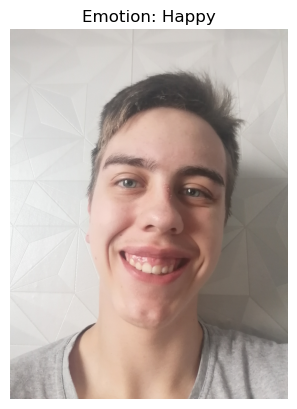

In [9]:
import random
rand_idx = random.randint(1, 18)
rand_label = random.choice(list(set(labels)))
rand_path = os.path.join(os.environ['PATH'] + '/images/' + str(rand_idx) + '/' + rand_label + '.jpg')
img = Image.open(rand_path)
plt.imshow(img)
plt.axis(False)
plt.title(f'Emotion: {rand_label}')
print(np.array(img).shape)
plt.show()

In [10]:
train_dest_dir = '/kaggle/working/train'
test_dest_dir = '/kaggle/working/test'

In [11]:
def copy_images(images, labels, dest_dir):
    for image, label in zip(images, labels):
        dest_label_dir = os.path.join(dest_dir, label)
        os.makedirs(dest_label_dir, exist_ok = True)
        dir_number = os.path.basename(os.path.dirname(image))
        filename = os.path.basename(image)
        unique_filename = f"{dir_number}_{filename}"
        dest_path = os.path.join(dest_label_dir, unique_filename)
        shutil.copy(image, dest_path)
    print(f"Copying process completed!")
        
os.makedirs(train_dest_dir, exist_ok = True)
os.makedirs(test_dest_dir, exist_ok = True)

copy_images(train_images, train_labels, train_dest_dir)
copy_images(test_images, test_labels, test_dest_dir)

Copying process completed!
Copying process completed!


In [12]:
os.listdir(train_dest_dir + '/Anger')

['13_Anger.jpg',
 '16_Anger.jpg',
 '6_Anger.jpg',
 '14_Anger.jpg',
 '1_Anger.jpg',
 '11_Anger.jpg',
 '9_Anger.jpg',
 '8_Anger.jpg',
 '10_Anger.jpg',
 '3_Anger.jpg',
 '5_Anger.jpg',
 '0_Anger.jpg',
 '12_Anger.jpg',
 '4_Anger.jpg',
 '18_Anger.jpg']

In [13]:
import torch
from torch import nn
from torch.utils.data import RandomSampler, SequentialSampler, DataLoader, Dataset
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchinfo import summary

transforms = transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.RandomVerticalFlip(p = 0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

In [14]:
BATCH_SIZE = 32

train_ds = ImageFolder(root = train_dest_dir, transform = transforms)
test_ds = ImageFolder(root = test_dest_dir, transform = transforms)

train_ds, test_ds

(Dataset ImageFolder
     Number of datapoints: 121
     Root location: /kaggle/working/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset ImageFolder
     Number of datapoints: 31
     Root location: /kaggle/working/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

In [15]:
train_loader = DataLoader(train_ds, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_ds, batch_size = 32)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7f4daa5e8fd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f4daa5e9990>)

In [16]:
classes = list(set(labels))
num_classes = len(classes)

In [17]:
import torch.nn.functional as F
class CNN(nn.Module):
    def __init__(self, num_classes = None):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(3, 32, 3),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, 3),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, 5, 2, 2),
            nn.Dropout(0.4)
        )
        
        self.block_2 = nn.Sequential(
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, 3),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, 5, 2, 2),
            nn.Dropout(0.4)
        )
        
        self.block_3 = nn.Sequential(
            nn.Conv2d(64, 128, 3),
            nn.ReLU(),
            nn.BatchNorm2d(128)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.4),
            nn.Linear(128 * 51 * 51, 128),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.classifier(x)
        
        return F.softmax(x, dim = 1)

In [18]:
model = CNN(num_classes)
torch.compile(model)

OptimizedModule(
  (_orig_mod): CNN(
    (block_1): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      (4): ReLU()
      (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): Conv2d(32, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (7): Dropout(p=0.4, inplace=False)
    )
    (block_2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (4): ReLU()
      (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): Conv2d(64, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (7): Dropout(p=0.4, inp

In [19]:
x = torch.rand(32, 3, 224, 224)

x = model.block_1(x)
print('Dimensions after block_1:', x.shape)

x = model.block_2(x)
print('Dimensions after block_2:', x.shape)

x = model.block_3(x)
print('Dimensions after block_3:', x.shape)

x = model.classifier(x)
print('Dimensions after classifier:', x.shape)

Dimensions after block_1: torch.Size([32, 32, 110, 110])
Dimensions after block_2: torch.Size([32, 64, 53, 53])
Dimensions after block_3: torch.Size([32, 128, 51, 51])
Dimensions after classifier: torch.Size([32, 8])


In [20]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [21]:
import torchmetrics
accuracy_metric = torchmetrics.Accuracy(task = 'multiclass', num_classes = num_classes).to(device)

# Base approach

In [22]:
from torch.nn import Module
def train_step(model: Module,
              dataloader: DataLoader,
              optim: torch.optim,
              criterion: Module,
              accuracy_fn: torchmetrics.Accuracy,
              device: torch.device = device
              ):
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for step, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        logits = model(X)
        loss = criterion(logits, y)
        train_loss += loss.item()
        
        preds = logits.argmax(dim = 1)
        train_acc += accuracy_fn(preds, y).item()
        
        optim.zero_grad()
        loss.backward()
        optim.step()
    
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    return train_loss

def test_step(model: Module,
             dataloader: DataLoader,
             criterion: Module,
             accuracy_fn: torchmetrics.Accuracy,
             device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for step, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            logits = model(X)
            loss = criterion(logits, y)
            test_loss += loss.item()
            
            preds = logits.argmax(dim = 1)
            test_acc += accuracy_fn(preds, y).item()
            
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")
    return test_loss

In [23]:
optimizer = torch.optim.Adam(model.parameters(), weight_decay = 0.001)
criterion = nn.CrossEntropyLoss(label_smoothing = 0.01)

# LR Scheduler, Model Checkpointing and Early Callback

In [24]:
# from torch.optim.lr_scheduler import CosineAnnealingLR

# epochs = 10
# best_val_loss = float('inf')
# patience = 0
# scheduler = CosineAnnealingLR(optimizer, T_max = 4, eta_min = 0)

# for epoch in range(epochs):
#     print('-'*50 + f"Current epoch: {epoch + 1}" + '-'*50)
#     print('Training...\n')
#     train_loss = train_step(model = model,
#                dataloader = train_loader,
#                criterion = criterion,
#                optim = optimizer, 
#                accuracy_fn = accuracy_metric,
#                device = device)
    
#     scheduler.step()
       
#     print('\nEvaluating...\n')
#     val_loss = test_step(model = model,
#              dataloader = test_loader,
#              criterion = criterion,
#              accuracy_fn = accuracy_metric,
#              device = device)
    
#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         patience = 0
#         torch.save(model.state_dict(), 'best_model.pth')
#         print(f"Saved best model with validation loss: {best_val_loss}")

#     else:
#         patience += 1
#         if patience > 3:
#             break
            
# print('Training complete!')

# Mixed Precision Training

In [25]:
from torch.cuda.amp import autocast, GradScaler
def train_step_mp(model: Module,
              dataloader: DataLoader,
              optim: torch.optim,
              criterion: Module,
              accuracy_fn: torchmetrics.Accuracy,
              scaler: GradScaler,
              device: torch.device = device
              ):
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for step, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        with autocast():
            logits = model(X)
            loss = criterion(logits, y)
            
        train_loss += loss.item()
        
        preds = logits.argmax(dim = 1)
        train_acc += accuracy_fn(preds, y).item()
        
        optim.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optim)
    
        scaler.update()
        
        train_loss += loss.item()
        
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    return train_loss

def test_step(model: Module,
             dataloader: DataLoader,
             criterion: Module,
             accuracy_fn: torchmetrics.Accuracy,
             device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for step, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            logits = model(X)
            loss = criterion(logits, y)
            test_loss += loss.item()
            
            preds = logits.argmax(dim = 1)
            test_acc += accuracy_fn(preds, y).item()
            
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")
    return test_loss

In [26]:
from torch.optim.lr_scheduler import CosineAnnealingLR

epochs = 10
best_val_loss = float('inf')
patience = 0
scheduler = CosineAnnealingLR(optimizer, T_max = 4, eta_min = 0)
scaler = GradScaler()

for epoch in range(epochs):
    print('-'*50 + f"Current epoch: {epoch + 1}" + '-'*50)
    print('Training...\n')
    train_loss = train_step_mp(model = model,
               dataloader = train_loader,
               criterion = criterion,
               optim = optimizer, 
               scaler = scaler,
               accuracy_fn = accuracy_metric,
               device = device)
    
    scheduler.step()
       
    print('\nEvaluating...\n')
    val_loss = test_step(model = model,
             dataloader = test_loader,
             criterion = criterion,
             accuracy_fn = accuracy_metric,
             device = device)
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience = 0
        torch.save(model.state_dict(), 'best_model.pth')
        print(f"Saved best model with validation loss: {best_val_loss}")

    else:
        patience += 1
        if patience > 3:
            break
            
print('Training complete!')

--------------------------------------------------Current epoch: 1--------------------------------------------------
Training...

Train loss: 4.31177 | Train accuracy: 0.12%

Evaluating...

Test loss: 2.13705 | Test accuracy: 0.13%
Saved best model with validation loss: 2.137052059173584
--------------------------------------------------Current epoch: 2--------------------------------------------------
Training...

Train loss: 4.22509 | Train accuracy: 0.15%

Evaluating...

Test loss: 2.13967 | Test accuracy: 0.13%
--------------------------------------------------Current epoch: 3--------------------------------------------------
Training...

Train loss: 4.29639 | Train accuracy: 0.12%

Evaluating...

Test loss: 2.18529 | Test accuracy: 0.06%
--------------------------------------------------Current epoch: 4--------------------------------------------------
Training...

Train loss: 4.34360 | Train accuracy: 0.10%

Evaluating...

Test loss: 2.14360 | Test accuracy: 0.13%
---------------

# Transfer Learning

In [27]:
import torchvision
import timm
print('TIMM Module:')
display(dir(timm))
print('\nTorchvision Module:')
display(dir(torchvision))

TIMM Module:


['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'create_model',
 'data',
 'get_pretrained_cfg',
 'get_pretrained_cfg_value',
 'is_exportable',
 'is_model',
 'is_model_pretrained',
 'is_scriptable',
 'layers',
 'list_models',
 'list_modules',
 'list_pretrained',
 'model_entrypoint',
 'models',
 'set_exportable',
 'set_scriptable',
 'utils',
 'version']


Torchvision Module:


['Module',
 '_BETA_TRANSFORMS_WARNING',
 '_HAS_OPS',
 '_WARN_ABOUT_BETA_TRANSFORMS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_image_backend',
 '_internally_replaced_utils',
 '_is_tracing',
 '_utils',
 '_video_backend',
 'datasets',
 'disable_beta_transforms_warning',
 'extension',
 'get_image_backend',
 'get_video_backend',
 'io',
 'models',
 'ops',
 'os',
 'set_image_backend',
 'set_video_backend',
 'torch',
 'transforms',
 'utils',
 'version',
 'warnings']

In [28]:
# TIMM
timm.list_models()

['bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_r

In [29]:
# # Torchvision
# from torchvision.models import get_model, get_model_weights, get_weight, list_models
# list_models()

In [30]:
# Opt to use TIMM this time round to learn more about its API
# Model of choice is still ResNet
model = timm.create_model('resnet50', pretrained = True, num_classes = num_classes)

In [31]:
from torchinfo import summary
summary(model,
       input_size = (32, 3, 224, 224),
       )

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [32, 8]                   --
├─Conv2d: 1-1                            [32, 64, 112, 112]        9,408
├─BatchNorm2d: 1-2                       [32, 64, 112, 112]        128
├─ReLU: 1-3                              [32, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [32, 64, 56, 56]          --
├─Sequential: 1-5                        [32, 256, 56, 56]         --
│    └─Bottleneck: 2-1                   [32, 256, 56, 56]         --
│    │    └─Conv2d: 3-1                  [32, 64, 56, 56]          4,096
│    │    └─BatchNorm2d: 3-2             [32, 64, 56, 56]          128
│    │    └─ReLU: 3-3                    [32, 64, 56, 56]          --
│    │    └─Conv2d: 3-4                  [32, 64, 56, 56]          36,864
│    │    └─BatchNorm2d: 3-5             [32, 64, 56, 56]          128
│    │    └─Identity: 3-6                [32, 64, 56, 56]          --
│ 

In [32]:
# Freeze all layers first
for params in model.parameters():
    params.requires_grad = False

In [33]:
for name, param in model.named_parameters():
    print(f"Layer: {name}, Trainable: {param.requires_grad}")

Layer: conv1.weight, Trainable: False
Layer: bn1.weight, Trainable: False
Layer: bn1.bias, Trainable: False
Layer: layer1.0.conv1.weight, Trainable: False
Layer: layer1.0.bn1.weight, Trainable: False
Layer: layer1.0.bn1.bias, Trainable: False
Layer: layer1.0.conv2.weight, Trainable: False
Layer: layer1.0.bn2.weight, Trainable: False
Layer: layer1.0.bn2.bias, Trainable: False
Layer: layer1.0.conv3.weight, Trainable: False
Layer: layer1.0.bn3.weight, Trainable: False
Layer: layer1.0.bn3.bias, Trainable: False
Layer: layer1.0.downsample.0.weight, Trainable: False
Layer: layer1.0.downsample.1.weight, Trainable: False
Layer: layer1.0.downsample.1.bias, Trainable: False
Layer: layer1.1.conv1.weight, Trainable: False
Layer: layer1.1.bn1.weight, Trainable: False
Layer: layer1.1.bn1.bias, Trainable: False
Layer: layer1.1.conv2.weight, Trainable: False
Layer: layer1.1.bn2.weight, Trainable: False
Layer: layer1.1.bn2.bias, Trainable: False
Layer: layer1.1.conv3.weight, Trainable: False
Layer: lay

In [34]:
for param in model.layer4.parameters():
    param.requires_grad = True

for param in model.fc.parameters():
    param.requires_grad = True

In [35]:
for name, param in model.named_parameters():
    print(f"Layer: {name}, Trainable: {param.requires_grad}")

Layer: conv1.weight, Trainable: False
Layer: bn1.weight, Trainable: False
Layer: bn1.bias, Trainable: False
Layer: layer1.0.conv1.weight, Trainable: False
Layer: layer1.0.bn1.weight, Trainable: False
Layer: layer1.0.bn1.bias, Trainable: False
Layer: layer1.0.conv2.weight, Trainable: False
Layer: layer1.0.bn2.weight, Trainable: False
Layer: layer1.0.bn2.bias, Trainable: False
Layer: layer1.0.conv3.weight, Trainable: False
Layer: layer1.0.bn3.weight, Trainable: False
Layer: layer1.0.bn3.bias, Trainable: False
Layer: layer1.0.downsample.0.weight, Trainable: False
Layer: layer1.0.downsample.1.weight, Trainable: False
Layer: layer1.0.downsample.1.bias, Trainable: False
Layer: layer1.1.conv1.weight, Trainable: False
Layer: layer1.1.bn1.weight, Trainable: False
Layer: layer1.1.bn1.bias, Trainable: False
Layer: layer1.1.conv2.weight, Trainable: False
Layer: layer1.1.bn2.weight, Trainable: False
Layer: layer1.1.bn2.bias, Trainable: False
Layer: layer1.1.conv3.weight, Trainable: False
Layer: lay

In [36]:
from timm.data import resolve_data_config

from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
config

train_transform = create_transform(**config, is_training = True)
test_transform = create_transform(**config)

train_transform, test_transform

(Compose(
     RandomResizedCropAndInterpolation(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bicubic)
     RandomHorizontalFlip(p=0.5)
     ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=None)
     ToTensor()
     Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
 ),
 Compose(
     Resize(size=235, interpolation=bicubic, max_size=None, antialias=warn)
     CenterCrop(size=(224, 224))
     ToTensor()
     Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
 ))

In [37]:
train_ds = ImageFolder(root = train_dest_dir, transform = train_transform)
test_ds = ImageFolder(root = test_dest_dir, transform = test_transform)

train_loader = DataLoader(train_ds, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_ds, batch_size = 32)

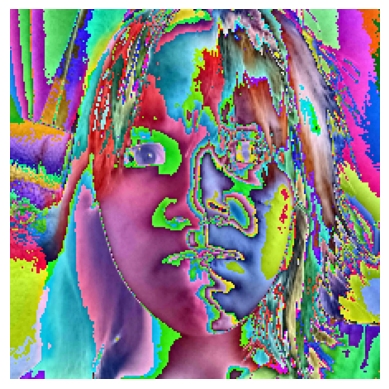

In [38]:
batch_img, batch_label = next(iter(test_loader))
batch_img, batch_label 
curr_img = batch_img[0].permute(1, 2, 0)
curr_img = np.array((curr_img * 255)).astype(np.uint8)
data = Image.fromarray(curr_img).convert('RGB')
plt.imshow(data)
plt.axis('off')
plt.show()

In [39]:
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [40]:
torch.compile(model)

OptimizedModule(
  (_orig_mod): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1

In [41]:
# WHY ARE MY RESULTS SO BAD

epochs = 10

for epoch in range(epochs):
    print("-"*50 + f" Current epoch: {epoch + 1} " + "-"*50)
    train_step(model = model,
              dataloader = train_loader,
              criterion = criterion,
              optim = optimizer,
              accuracy_fn = accuracy_metric,
              device = device
              )
    test_step(model = model,
             dataloader = test_loader,
             criterion = criterion,
             accuracy_fn = accuracy_metric,
             device = device)

-------------------------------------------------- Current epoch: 1 --------------------------------------------------
Train loss: 2.08982 | Train accuracy: 0.12%
Test loss: 2.11381 | Test accuracy: 0.06%
-------------------------------------------------- Current epoch: 2 --------------------------------------------------
Train loss: 2.05673 | Train accuracy: 0.25%
Test loss: 2.11849 | Test accuracy: 0.10%
-------------------------------------------------- Current epoch: 3 --------------------------------------------------
Train loss: 2.04328 | Train accuracy: 0.16%
Test loss: 2.11974 | Test accuracy: 0.10%
-------------------------------------------------- Current epoch: 4 --------------------------------------------------
Train loss: 2.02521 | Train accuracy: 0.22%
Test loss: 2.13216 | Test accuracy: 0.10%
-------------------------------------------------- Current epoch: 5 --------------------------------------------------
Train loss: 2.02213 | Train accuracy: 0.25%
Test loss: 2.1514